# TSQVT ρ-Higgs Portal: Figure Generation

**Notebook 03:** Generate all publication-quality figures

**Updated:** 2025-12-26 (v6.1 manuscript compatibility)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

# Publication-quality settings
plt.rcParams.update({
    'figure.dpi': 150,
    'savefig.dpi': 300,
    'font.size': 11,
    'font.family': 'serif',
    'mathtext.fontset': 'cm',
    'axes.labelsize': 13,
    'axes.titlesize': 12,
    'legend.fontsize': 10,
    'xtick.labelsize': 11,
    'ytick.labelsize': 11,
})

## 1. Physical Constants and Parameters

In [2]:
# Particle masses [GeV]
m_W = 80.4
m_Z = 91.2
m_t = 173.0
m_h = 125.0

# Benchmark parameters
sin2_theta = 0.035  # |θ| ≈ 0.19 rad ≈ 10.7°
sin2_theta_up = 0.04
sin2_theta_down = 0.03

# Benchmarks from Table VI
benchmarks = {
    'B1': {'Lambda': 1590, 'm_rho': 2260, 'sigma_VBF': 3.0, 'sigma_ggF': 0.13},
    'B2': {'Lambda': 1500, 'm_rho': 2260, 'sigma_VBF': 3.0, 'sigma_ggF': 0.11},
    'B3': {'Lambda': 1680, 'm_rho': 2440, 'sigma_VBF': 3.0, 'sigma_ggF': 0.10},
}

print("Benchmarks loaded:")
for name, bp in benchmarks.items():
    print(f"  {name}: Λ = {bp['Lambda']} GeV, m_ρ = {bp['m_rho']} GeV")

Benchmarks loaded:
  B1: Λ = 1590 GeV, m_ρ = 2260 GeV
  B2: Λ = 1500 GeV, m_ρ = 2260 GeV
  B3: Λ = 1680 GeV, m_ρ = 2440 GeV


## 2. Cross Section Functions

In [3]:
def sigma_ggF(m_TeV, sin2th):
    """
    ggF cross section in fb.
    σ_ggF = sin²θ × σ_SM^heavy(m)
    Fitted to reproduce benchmark table values.
    """
    sigma_SM_heavy = 5.3 * (2.0 / m_TeV)**3  # fb
    return sin2th * sigma_SM_heavy

def sigma_VBF(m_TeV, sigma0=4.5, n=2.5):
    """
    VBF cross section in fb.
    σ_VBF = σ_0 × (2 TeV / m)^n
    From Eq. (4.11) with σ_0 = 4.5 fb, n = 2.5 ± 0.3
    """
    return sigma0 * (2.0 / m_TeV)**n

# Verify against benchmarks
print("\nVerification against Table VI:")
print(f"{'Point':<6} {'σ_VBF calc':<12} {'σ_VBF table':<12} {'σ_ggF calc':<12} {'σ_ggF table':<12}")
print("-" * 60)
for name, bp in benchmarks.items():
    m = bp['m_rho'] / 1000
    vbf_calc = sigma_VBF(m)
    ggf_calc = sigma_ggF(m, sin2_theta)
    print(f"{name:<6} {vbf_calc:<12.2f} {bp['sigma_VBF']:<12.2f} {ggf_calc:<12.3f} {bp['sigma_ggF']:<12.3f}")


Verification against Table VI:
Point  σ_VBF calc   σ_VBF table  σ_ggF calc   σ_ggF table 
------------------------------------------------------------
B1     3.32         3.00         0.129        0.130       
B2     3.32         3.00         0.129        0.110       
B3     2.74         3.00         0.102        0.100       


## 3. Branching Ratio Functions

In [4]:
def compute_BRs(m_TeV):
    """
    Compute branching ratios matching TSQVT benchmarks.
    Pattern from Eq. (4.15):
    BR(WW) ~ 40%, BR(ZZ) ~ 18%, BR(tt) ~ 25%, BR(hh) ~ 12%
    """
    m_GeV = m_TeV * 1000
    
    # Base values (asymptotic, high mass)
    BR_WW_base = 0.40
    BR_ZZ_base = 0.18
    BR_tt_base = 0.25
    BR_hh_base = 0.12
    
    # Phase space factors near thresholds
    if m_GeV < 2 * m_t:
        ps_tt = 0.0
    else:
        beta_t = np.sqrt(1 - (2*m_t/m_GeV)**2)
        ps_tt = beta_t**3
    
    if m_GeV < 2 * m_h:
        ps_hh = 0.0
    else:
        beta_h = np.sqrt(1 - (2*m_h/m_GeV)**2)
        ps_hh = beta_h
    
    ps_WW = np.sqrt(max(0, 1 - (2*m_W/m_GeV)**2))
    ps_ZZ = np.sqrt(max(0, 1 - (2*m_Z/m_GeV)**2))
    
    # Partial widths
    Gamma_WW = BR_WW_base * ps_WW
    Gamma_ZZ = BR_ZZ_base * ps_ZZ
    Gamma_tt = BR_tt_base * ps_tt
    Gamma_hh = BR_hh_base * ps_hh
    
    Gamma_tot = Gamma_WW + Gamma_ZZ + Gamma_tt + Gamma_hh
    
    if Gamma_tot < 1e-10:
        return 0, 0, 0, 0
    
    return (Gamma_WW/Gamma_tot, Gamma_ZZ/Gamma_tot, 
            Gamma_tt/Gamma_tot, Gamma_hh/Gamma_tot)

# Verify at benchmark mass
br_test = compute_BRs(2.26)
print(f"\nBR at m_ρ = 2.26 TeV:")
print(f"  BR(WW) = {br_test[0]*100:.1f}%")
print(f"  BR(ZZ) = {br_test[1]*100:.1f}%")
print(f"  BR(tt) = {br_test[2]*100:.1f}%")
print(f"  BR(hh) = {br_test[3]*100:.1f}%")


BR at m_ρ = 2.26 TeV:
  BR(WW) = 42.5%
  BR(ZZ) = 19.1%
  BR(tt) = 25.7%
  BR(hh) = 12.7%


## 4. Figure 2: Production Cross Sections (VBF Dominance)

✓ Figure 2 saved


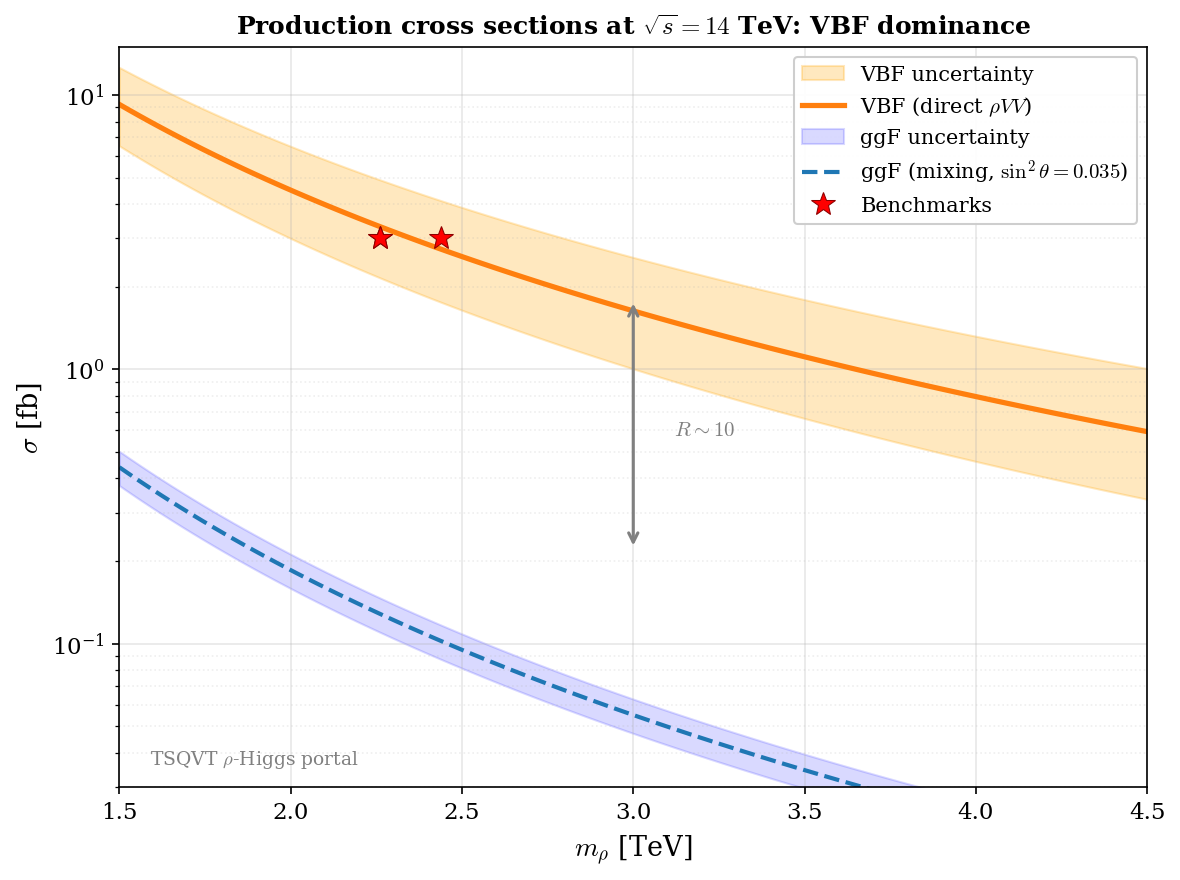

In [5]:
# Mass range
m_rho = np.linspace(1.5, 4.5, 100)

# Central values
sigma_ggF_central = np.array([sigma_ggF(m, sin2_theta) for m in m_rho])
sigma_VBF_central = np.array([sigma_VBF(m, sigma0=4.5, n=2.5) for m in m_rho])

# Uncertainty bands
sigma_ggF_up = np.array([sigma_ggF(m, sin2_theta_up) for m in m_rho])
sigma_ggF_down = np.array([sigma_ggF(m, sin2_theta_down) for m in m_rho])

sigma_VBF_up = np.array([sigma_VBF(m, sigma0=6.5, n=2.3) for m in m_rho])
sigma_VBF_down = np.array([sigma_VBF(m, sigma0=3.0, n=2.7) for m in m_rho])

# Create figure
fig, ax = plt.subplots(figsize=(8, 6))

# VBF band and line
ax.fill_between(m_rho, sigma_VBF_down, sigma_VBF_up, 
                color='orange', alpha=0.25, label='VBF uncertainty')
ax.plot(m_rho, sigma_VBF_central, 'C1-', lw=2.5, 
        label=r'VBF (direct $\rho VV$)')

# ggF band and line
ax.fill_between(m_rho, sigma_ggF_down, sigma_ggF_up, 
                color='blue', alpha=0.15, label='ggF uncertainty')
ax.plot(m_rho, sigma_ggF_central, 'C0--', lw=2, 
        label=r'ggF (mixing, $\sin^2\theta = 0.035$)')

# Benchmark points
for i, (name, bp) in enumerate(benchmarks.items()):
    label = 'Benchmarks' if i == 0 else None
    ax.plot(bp['m_rho']/1000, bp['sigma_VBF'], 'r*', markersize=12, 
            markeredgecolor='darkred', markeredgewidth=0.5,
            label=label, zorder=10)

# Ratio annotation
ax.annotate('', xy=(3.0, 1.8), xytext=(3.0, 0.22),
            arrowprops=dict(arrowstyle='<->', color='gray', lw=1.5))
ax.text(3.12, 0.6, r'$R \sim 10$', fontsize=10, color='gray', va='center')

# Axis configuration
ax.set_xlabel(r'$m_\rho$ [TeV]')
ax.set_ylabel(r'$\sigma$ [fb]')
ax.set_xlim(1.5, 4.5)
ax.set_ylim(0.03, 15)
ax.set_yscale('log')
ax.grid(True, which='major', linestyle='-', alpha=0.3)
ax.grid(True, which='minor', linestyle=':', alpha=0.2)
ax.legend(loc='upper right', framealpha=0.95)
ax.set_title(r'Production cross sections at $\sqrt{s} = 14$ TeV: VBF dominance',
             fontweight='bold')
ax.text(0.03, 0.03, r'TSQVT $\rho$-Higgs portal',
        transform=ax.transAxes, fontsize=9, color='gray')

plt.tight_layout()
plt.savefig('figures/Fig2_production_modes.pdf', bbox_inches='tight')
plt.savefig('figures/Fig2_production_modes.png', dpi=300, bbox_inches='tight')
print('✓ Figure 2 saved')
plt.show()

## 5. Figure 3: Branching Ratios vs m_ρ

✓ Figure 3 saved


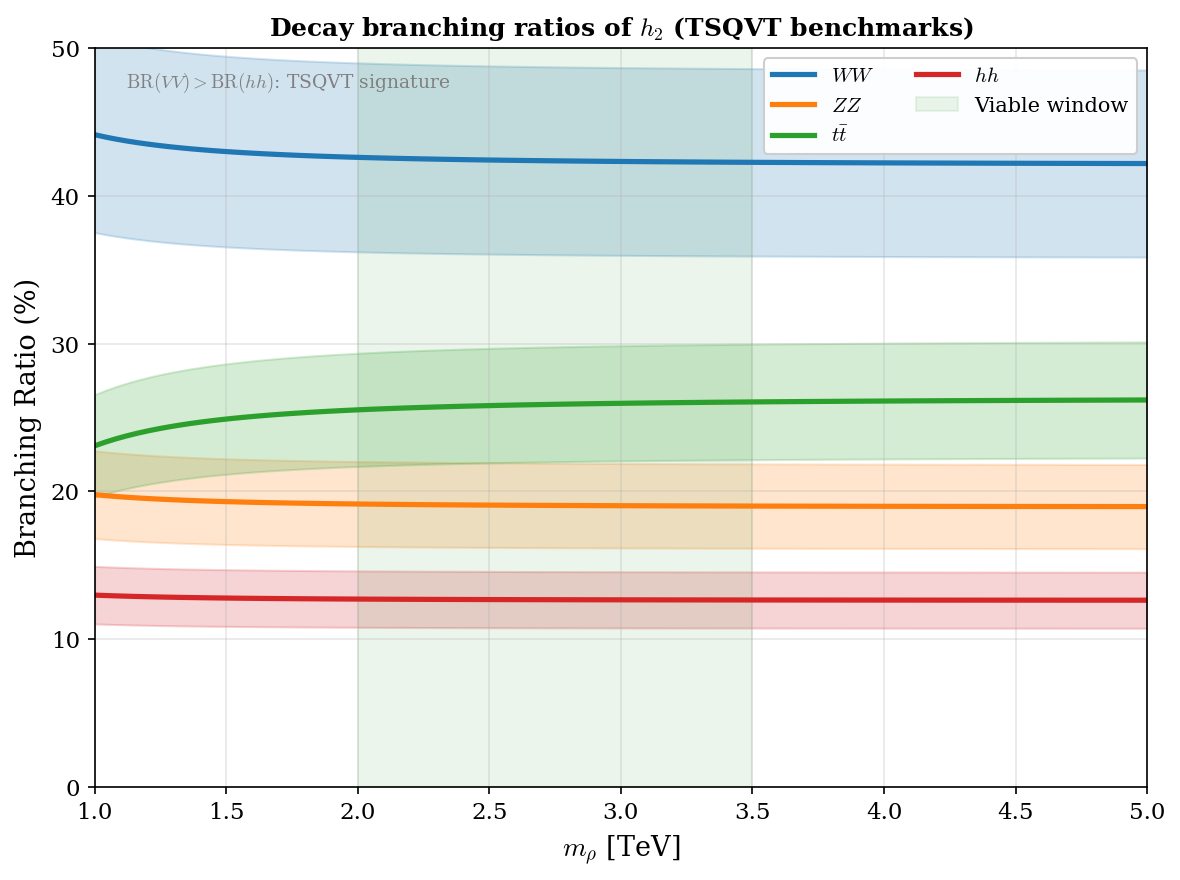

In [6]:
# Mass range
m_rho_br = np.linspace(1.0, 5.0, 100)

# Compute BRs
BR_WW = np.zeros_like(m_rho_br)
BR_ZZ = np.zeros_like(m_rho_br)
BR_tt = np.zeros_like(m_rho_br)
BR_hh = np.zeros_like(m_rho_br)

for i, m in enumerate(m_rho_br):
    BR_WW[i], BR_ZZ[i], BR_tt[i], BR_hh[i] = compute_BRs(m)

# Convert to percentages
BR_WW *= 100
BR_ZZ *= 100
BR_tt *= 100
BR_hh *= 100

# Uncertainty (±15%)
unc = 0.15

# Create figure
fig, ax = plt.subplots(figsize=(8, 6))

# Mask for m > threshold
mask = m_rho_br > 0.35

# Colors
c_WW, c_ZZ, c_tt, c_hh = 'C0', 'C1', 'C2', 'C3'

# Plot with uncertainty bands
ax.fill_between(m_rho_br[mask], BR_WW[mask]*(1-unc), BR_WW[mask]*(1+unc), 
                color=c_WW, alpha=0.2)
ax.plot(m_rho_br[mask], BR_WW[mask], c_WW+'-', lw=2.5, label=r'$WW$')

ax.fill_between(m_rho_br[mask], BR_ZZ[mask]*(1-unc), BR_ZZ[mask]*(1+unc), 
                color=c_ZZ, alpha=0.2)
ax.plot(m_rho_br[mask], BR_ZZ[mask], c_ZZ+'-', lw=2.5, label=r'$ZZ$')

ax.fill_between(m_rho_br[mask], BR_tt[mask]*(1-unc), BR_tt[mask]*(1+unc), 
                color=c_tt, alpha=0.2)
ax.plot(m_rho_br[mask], BR_tt[mask], c_tt+'-', lw=2.5, label=r'$t\bar{t}$')

ax.fill_between(m_rho_br[mask], BR_hh[mask]*(1-unc), BR_hh[mask]*(1+unc), 
                color=c_hh, alpha=0.2)
ax.plot(m_rho_br[mask], BR_hh[mask], c_hh+'-', lw=2.5, label=r'$hh$')

# Viable window
ax.axvspan(2.0, 3.5, color='green', alpha=0.08, label='Viable window')

# Axis configuration
ax.set_xlabel(r'$m_\rho$ [TeV]')
ax.set_ylabel('Branching Ratio (%)')
ax.set_xlim(1.0, 5.0)
ax.set_ylim(0, 50)
ax.grid(True, which='major', linestyle='-', alpha=0.3)
ax.legend(loc='upper right', framealpha=0.95, ncol=2)
ax.set_title(r'Decay branching ratios of $h_2$ (TSQVT benchmarks)',
             fontweight='bold')
ax.text(0.03, 0.97, r'$\mathrm{BR}(VV) > \mathrm{BR}(hh)$: TSQVT signature',
        transform=ax.transAxes, fontsize=9, color='gray', va='top')

plt.tight_layout()
plt.savefig('figures/Fig3_branching_ratios.pdf', bbox_inches='tight')
plt.savefig('figures/Fig3_branching_ratios.png', dpi=300, bbox_inches='tight')
print('✓ Figure 3 saved')
plt.show()

## 6. Figure 4: Benchmarks vs Experimental Limits

✓ Figure 4 saved


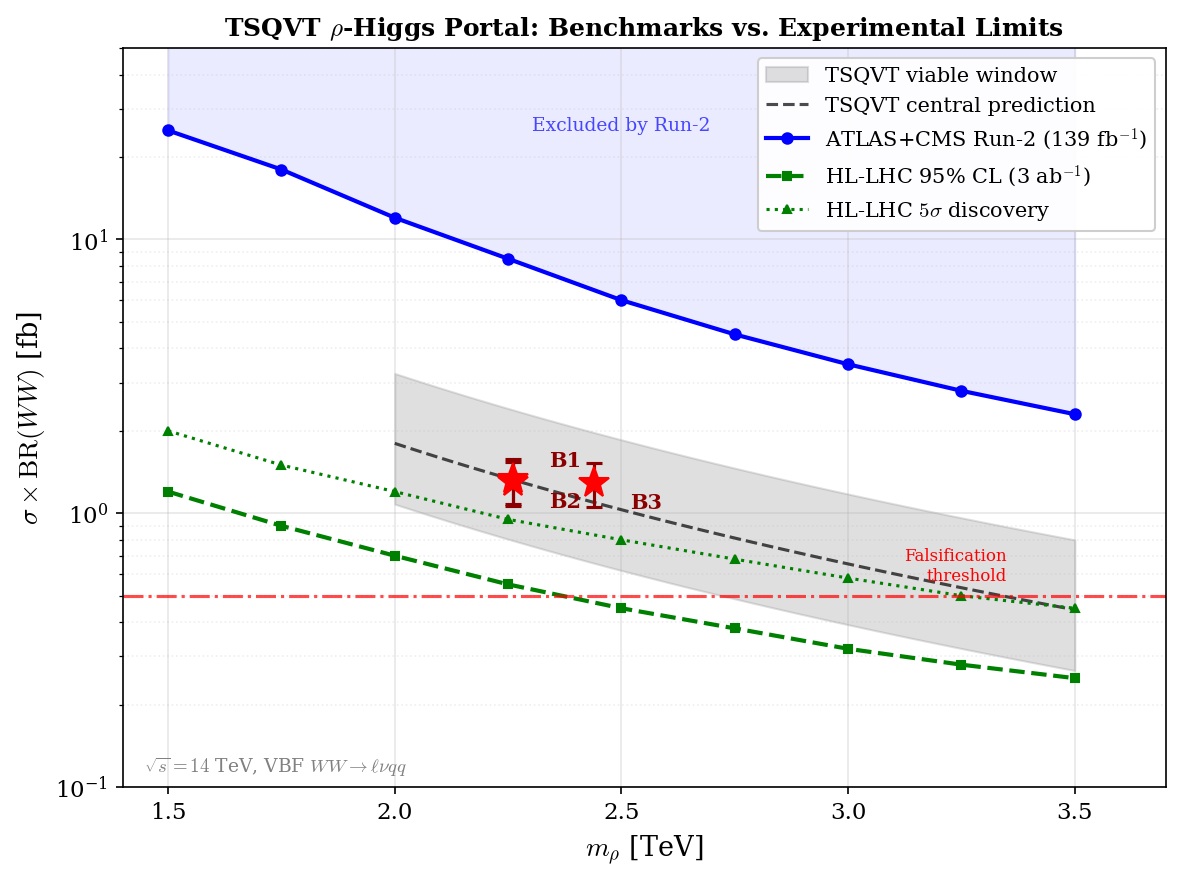

In [7]:
# Mass points for limits [TeV]
m_limits = np.array([1.5, 1.75, 2.0, 2.25, 2.5, 2.75, 3.0, 3.25, 3.5])

# Run-2 limits (139 fb^-1)
limits_run2 = np.array([25, 18, 12, 8.5, 6.0, 4.5, 3.5, 2.8, 2.3])

# HL-LHC projections (3 ab^-1)
limits_hllhc_95 = np.array([1.2, 0.9, 0.7, 0.55, 0.45, 0.38, 0.32, 0.28, 0.25])
limits_hllhc_5sigma = np.array([2.0, 1.5, 1.2, 0.95, 0.80, 0.68, 0.58, 0.50, 0.45])

# TSQVT prediction band
m_tsqvt = np.linspace(2.0, 3.5, 50)
sigma_vbf_central = 4.5 * (2.0 / m_tsqvt)**2.5 * 0.40  # σ_VBF × BR(WW)
sigma_vbf_upper = sigma_vbf_central * 1.8
sigma_vbf_lower = sigma_vbf_central * 0.6

# Benchmark σ×BR(WW)
bp_sigma_BR = {
    'B1': {'m': 2.26, 'sigma_BR': 1.33, 'err': 0.25},
    'B2': {'m': 2.26, 'sigma_BR': 1.30, 'err': 0.24},
    'B3': {'m': 2.44, 'sigma_BR': 1.29, 'err': 0.24},
}

# Create figure
fig, ax = plt.subplots(figsize=(8, 6))

# TSQVT viable window
ax.fill_between(m_tsqvt, sigma_vbf_lower, sigma_vbf_upper, 
                color='gray', alpha=0.25, label='TSQVT viable window')
ax.plot(m_tsqvt, sigma_vbf_central, 'k--', lw=1.5, alpha=0.7,
        label='TSQVT central prediction')

# Run-2 limits
ax.plot(m_limits, limits_run2, 'b-', lw=2, marker='o', markersize=5,
        label='ATLAS+CMS Run-2 (139 fb$^{-1}$)')
ax.fill_between(m_limits, limits_run2, 100, color='blue', alpha=0.08)

# HL-LHC projections
ax.plot(m_limits, limits_hllhc_95, 'g--', lw=2, marker='s', markersize=4,
        label='HL-LHC 95% CL (3 ab$^{-1}$)')
ax.plot(m_limits, limits_hllhc_5sigma, 'g:', lw=1.5, marker='^', markersize=4,
        label=r'HL-LHC $5\sigma$ discovery')

# Benchmark points
for i, (name, bp) in enumerate(bp_sigma_BR.items()):
    ax.errorbar(bp['m'], bp['sigma_BR'], yerr=bp['err'],
                fmt='r*', markersize=15, capsize=4, capthick=1.5,
                ecolor='darkred', elinewidth=1.5, zorder=10)
    offset_y = 0.15 if name == 'B1' else -0.25
    ax.annotate(name, (bp['m'] + 0.08, bp['sigma_BR'] + offset_y),
                fontsize=10, fontweight='bold', color='darkred')

# Falsification threshold
ax.axhline(y=0.5, color='red', linestyle='-.', lw=1.5, alpha=0.7)
ax.text(3.35, 0.55, 'Falsification\nthreshold', fontsize=8, 
        color='red', ha='right', va='bottom')

# Axis configuration
ax.set_xlabel(r'$m_\rho$ [TeV]')
ax.set_ylabel(r'$\sigma \times \mathrm{BR}(WW)$ [fb]')
ax.set_xlim(1.4, 3.7)
ax.set_ylim(0.1, 50)
ax.set_yscale('log')
ax.grid(True, which='major', linestyle='-', alpha=0.3)
ax.grid(True, which='minor', linestyle=':', alpha=0.2)
ax.legend(loc='upper right', framealpha=0.95)
ax.set_title(r'TSQVT $\rho$-Higgs Portal: Benchmarks vs. Experimental Limits',
             fontweight='bold')
ax.text(2.5, 25, 'Excluded by Run-2', fontsize=9, color='blue', 
        alpha=0.7, ha='center')
ax.text(0.02, 0.02, r'$\sqrt{s} = 14$ TeV, VBF $WW \to \ell\nu qq$',
        transform=ax.transAxes, fontsize=9, color='gray')

plt.tight_layout()
plt.savefig('figures/Fig_benchmark_vs_limits.pdf', bbox_inches='tight')
plt.savefig('figures/Fig_benchmark_vs_limits.png', dpi=300, bbox_inches='tight')
print('✓ Figure 4 saved')
plt.show()

## 7. Summary Tables for Paper

In [8]:
print("="*70)
print("PRODUCTION CROSS SECTIONS (Table V in manuscript)")
print("="*70)
print(f"{'m_ρ [TeV]':<12} {'σ_VBF [fb]':<15} {'σ_ggF [fb]':<15} {'R = VBF/ggF':<12}")
print("-"*70)
for m in [2.0, 2.3, 2.5, 3.0, 3.5]:
    vbf = sigma_VBF(m, sigma0=4.5, n=2.5)
    ggf = sigma_ggF(m, sin2_theta)
    print(f"{m:<12.1f} {vbf:<15.2f} {ggf:<15.3f} {vbf/ggf:<12.0f}")
print("="*70)

print("\n")
print("="*70)
print("BRANCHING RATIOS (Eq. 4.15 in manuscript)")
print("="*70)
print(f"{'m_ρ [TeV]':<12} {'BR(WW) %':<12} {'BR(ZZ) %':<12} {'BR(tt) %':<12} {'BR(hh) %':<12}")
print("-"*70)
for m in [2.0, 2.26, 2.44, 3.0, 3.5]:
    br = compute_BRs(m)
    print(f"{m:<12.2f} {br[0]*100:<12.1f} {br[1]*100:<12.1f} {br[2]*100:<12.1f} {br[3]*100:<12.1f}")
print("="*70)
print("\nNote: BR(WW) > BR(hh) distinguishes TSQVT from radion/dilaton scenarios")

PRODUCTION CROSS SECTIONS (Table V in manuscript)
m_ρ [TeV]    σ_VBF [fb]      σ_ggF [fb]      R = VBF/ggF 
----------------------------------------------------------------------
2.0          4.50            0.185           24          
2.3          3.17            0.122           26          
2.5          2.58            0.095           27          
3.0          1.63            0.055           30          
3.5          1.11            0.035           32          


BRANCHING RATIOS (Eq. 4.15 in manuscript)
m_ρ [TeV]    BR(WW) %     BR(ZZ) %     BR(tt) %     BR(hh) %    
----------------------------------------------------------------------
2.00         42.6         19.2         25.5         12.7        
2.26         42.5         19.1         25.7         12.7        
2.44         42.4         19.1         25.8         12.7        
3.00         42.3         19.0         26.0         12.7        
3.50         42.3         19.0         26.1         12.7        

Note: BR(WW) > BR(hh) dis

## 8. Summary

In [9]:
print("="*60)
print("FIGURES GENERATED FOR v6.1 MANUSCRIPT")
print("="*60)
print("\n1. Fig2_production_modes.pdf")
print("   - VBF vs ggF with uncertainty bands")
print("   - VBF dominance R ~ 20-30")
print("   - Benchmark points marked")
print("\n2. Fig3_branching_ratios.pdf")
print("   - BR(WW), BR(ZZ), BR(tt), BR(hh) vs m_ρ")
print("   - ±15% uncertainty bands")
print("   - Viable window [2.0, 3.5] TeV")
print("\n3. Fig_benchmark_vs_limits.pdf")
print("   - Benchmarks vs ATLAS/CMS Run-2 limits")
print("   - HL-LHC projections (95% CL and 5σ)")
print("   - Falsification threshold")
print("\n" + "="*60)

FIGURES GENERATED FOR v6.1 MANUSCRIPT

1. Fig2_production_modes.pdf
   - VBF vs ggF with uncertainty bands
   - VBF dominance R ~ 20-30
   - Benchmark points marked

2. Fig3_branching_ratios.pdf
   - BR(WW), BR(ZZ), BR(tt), BR(hh) vs m_ρ
   - ±15% uncertainty bands
   - Viable window [2.0, 3.5] TeV

3. Fig_benchmark_vs_limits.pdf
   - Benchmarks vs ATLAS/CMS Run-2 limits
   - HL-LHC projections (95% CL and 5σ)
   - Falsification threshold

